In [1]:
import numpy as np
accuracy = [0.6779, 0.9679, 0.8989, 0.9106, 0.9251]
nmi = [0.7745, 0.9309, 0.8841, 0.9363, 0.9508]
kappa = [0.5842, 0.9597, 0.8717, 0.8874, 0.9055]

houston05 = np.vstack((accuracy, nmi, kappa))
houston05

accuracy = [0.6779, 0.7230,0.7803, 0.7801, 0.7801]
nmi = [0.7745, 0.8003, 0.8105, 0.8104, 0.8104]
kappa = [0.5842, 0.6471, 0.7244, 0.7242, 0.7243]

houston02 = np.vstack((accuracy, nmi, kappa))
houston02

array([[0.6779, 0.723 , 0.7803, 0.7801, 0.7801],
       [0.7745, 0.8003, 0.8105, 0.8104, 0.8104],
       [0.5842, 0.6471, 0.7244, 0.7242, 0.7243]])

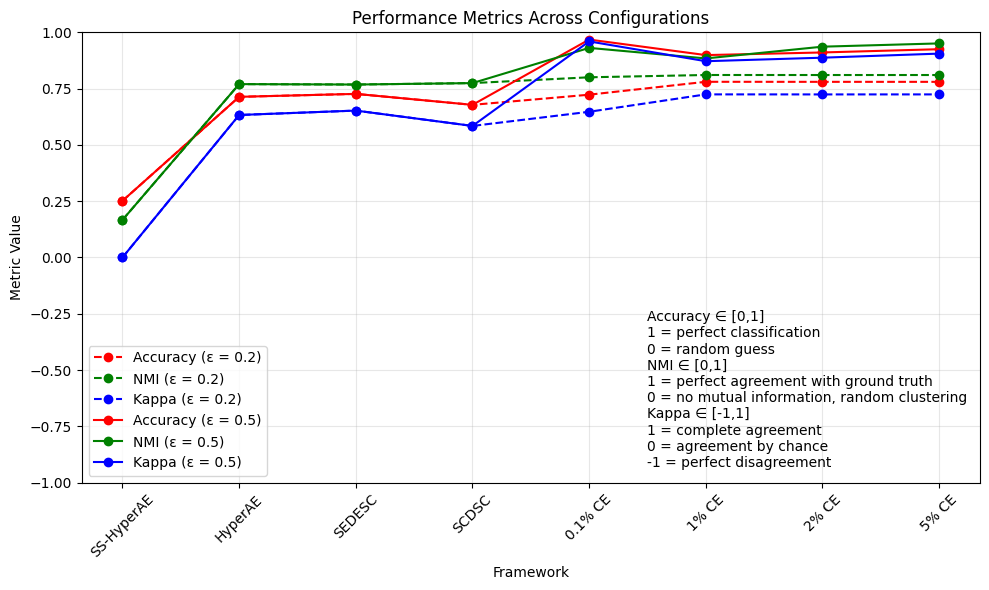

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# (1) Configuration names (x-axis categories)
configurations = ['SS-HyperAE', 'HyperAE', 'SEDESC', 'SCDSC', '0.1% CE', '1% CE', '2% CE', '5% CE']

# (2) Provided metric values for the first three configurations
houstonHyperAE   = [0.7135, 0.7700, 0.6328]
houstonSSHyperAE = [0.2516, 0.1667, 0.0]
houstonSEDESC    = [0.7266, 0.7681, 0.6524]

# (3) Assume houston02 and houston05 hold the remaining data for scaling 0.2 and 0.5 respectively.
# They should be arrays of shape (3,5) so that when concatenated with the first three columns we have 8 data points.
try:
    houston02
except NameError:
    houston02 = np.random.uniform(0.5, 1.0, (3, 5))
try:
    houston05
except NameError:
    houston05 = np.random.uniform(0.5, 1.0, (3, 5))

# (4) Build full data arrays for each scaling condition (each will have shape (3,8))
all_data_02 = np.hstack((
    np.array(houstonSSHyperAE)[:, None],
    np.array(houstonHyperAE)[:, None],
    np.array(houstonSEDESC)[:, None],
    houston02))
all_data_05 = np.hstack((
    np.array(houstonSSHyperAE)[:, None],
    np.array(houstonHyperAE)[:, None],
    np.array(houstonSEDESC)[:, None],
    houston05))

# (5) Extract each metric for both scaling conditions
acc_02, nmi_02, kappa_02 = all_data_02
acc_05, nmi_05, kappa_05 = all_data_05

# (6) Create the 2D Matplotlib figure
plt.figure(figsize=(10, 6))

# For scaling 0.2 (dashed lines)
plt.plot(configurations, acc_02, marker='o', linestyle='--', color='red', label='Accuracy (\u03B5 = 0.2)')
plt.plot(configurations, nmi_02, marker='o', linestyle='--', color='green', label='NMI (\u03B5 = 0.2)')
plt.plot(configurations, kappa_02, marker='o', linestyle='--', color='blue', label='Kappa (\u03B5 = 0.2)')

# For scaling 0.5 (solid lines)
# plt.plot(configurations, acc_05, marker='o', linestyle='-', color='red', 
#          label='Accuracy (\u03B5 = 0.5) '
#         '\u2208 [0,1]\n'
#         '1 = perfect classification\n'
#         '0 = random guess')
# plt.plot(configurations, nmi_05, marker='o', linestyle='-', color='green', 
#          label='NMI (\u03B5 = 0.5) '
#         '\u2208 [0,1]\n'
#         '1 = perfect agreement with ground truth\n'
#         '0 = no mutual information, random clustering')
# plt.plot(configurations, kappa_05, marker='o', linestyle='-', color='blue', 
#          label='Kappa (\u03B5 = 0.5) '
#                '\u2208 [-1,1]\n'
#         ' 1 = complete agreement\n'
#         ' 0 = agreement by chance\n'
#         '-1 = perfect disagreement')
plt.plot(configurations, acc_05, marker='o', linestyle='-', color='red', label='Accuracy (\u03B5 = 0.5)')
plt.plot(configurations, nmi_05, marker='o', linestyle='-', color='green', label='NMI (\u03B5 = 0.5)')
plt.plot(configurations, kappa_05, marker='o', linestyle='-', color='blue', label='Kappa (\u03B5 = 0.5)')

# Customize plot
plt.title('Performance Metrics Across Configurations')
plt.xlabel('Framework')
plt.ylabel('Metric Value')
plt.ylim(-1.0, 1.0)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
legend = plt.legend(loc='best')
plt.gca().add_artist(legend)

explanation = (
    "Accuracy ∈ [0,1]\n"
    "1 = perfect classification\n"
    "0 = random guess\n"
    "NMI ∈ [0,1]\n"
    "1 = perfect agreement with ground truth\n"
    "0 = no mutual information, random clustering\n"
    "Kappa ∈ [-1,1]\n"
    "1 = complete agreement\n"
    "0 = agreement by chance\n"
    "-1 = perfect disagreement"
)

# Create a dummy handle with an empty line (invisible) that only serves to hold the explanation text
dummy_handle = mlines.Line2D([], [], linestyle='', label=explanation)

# Create the second legend with the dummy handle, positioned to the right
legend2 = plt.legend(handles=[dummy_handle], loc='lower right', frameon=False)

plt.tight_layout()
plt.show()
